In [6]:
import numpy as np
import pandas as pd
from datetime import datetime,date

import missingno as msno

import warnings
warnings.filterwarnings("ignore")


<b>Pandas</b> é uma biblioteca de software utilizada para manipulação e análise de dados. 
<br>Em particular, oferece estruturas e operações para manipular tabelas numéricas e séries temporais.

<b>Numpy</b> é uma biblioteca para a linguagem Python com funções para se trabalhar com computação numérica. <br>
O NumPy fornece um grande conjunto de funções e operações de biblioteca que ajudam os programadores a executar facilmente cálculos numéricos

<b>Datetime</b> é uma biblioteca para a linguagem Python com funções de manipular Datas.
<br>datetime.date – Usada para representar apenas datas simples, com ano, mês e dia, sem informação de fuso horário.
<br>datetime.datetime – Combina os valores das classes date e time em um objeto só. Cuidado para não fazer confusão com o nome do módulo, que é o mesmo da classe.

<b>Missingno</b> é uma biblioteca que permite que você visualize dados nulos em seu dataset <br>

<b>Warnings</b> é uma biblioteca de controle de Avisos.<br>

### **A) Definições de Funções**

In [7]:
def ExtracaoAlvo(df,var_mes):
    Linha =  df.shape[0]
    
    aCols = np.arange(0,df.shape[1])
    df_alvo = pd.DataFrame(columns = aCols )
    
    for lin in range(Linha):   
        if ( (df.loc[lin,0] == -42.75) and (df.loc[lin,1] == -14.25)):
            variavel = df.values[lin,]
            df_alvo.loc[0] = variavel
    
    
    refdia = 1     
    Linha1    =  df_alvo.shape[0] 
    Colunas1  =  df_alvo.shape[1] 

   
    for lin2 in range(Linha1): 
        refhora = 0
    
        for col in range (Colunas1):        
            if col > 1: 
                if col % 2 == 0: # Se o número (col) for par 
                    
                    data = datetime(year=2017, month = var_mes, day = refdia, hour = refhora, minute=0, second=0)
                   
                    lin_alvo = [df_alvo.loc[0,0], df_alvo.loc[0,1] , df_alvo.loc[0,col] ,df_alvo.loc[0,(col+1)], data] 
                
                    df_result_vento.loc[len(df_result_vento)] = lin_alvo  # adding a row
                
                    refhora = refhora + 1
                
                    if refhora == 24:                    
                        refdia = refdia + 1
                        refhora = 0
    variavel = "ok"
    return variavel
    

### **B) Configuração de Dataframe Resultado**

In [8]:
frente = ['Longitude', 'Latitude', 'VentoPrevisto','Direcao', 'Data']  # Cabeçalho
df_result_vento = pd.DataFrame(columns=frente)  # Criação de um dataframe vazio


### **C) Coleta dos Dados de Vento ECMWF**

In [9]:
mes = 1

for i in range(12):
    if i < 9:
        source_file = '../../../../PrevisaoVento/Data/raw/vento/vNE_2017_0' + str(mes) + '_100m.txt'
        # print(source_file)           
        df_vento = pd.read_csv(source_file, delimiter = r"\s+", header=None)
        a = ExtracaoAlvo(df_vento,mes)
        # print(a)
        
    else:
        source_file = '../../../../PrevisaoVento/Data/raw/vento/vNE_2017_' + str(mes) + '_100m.txt'
        # print(source_file)       
        df_vento = pd.read_csv(source_file, delimiter = r"\s+", header=None)  
        
        a = ExtracaoAlvo(df_vento,mes)
        # print(a)
    
    
    mes = mes + 1




### **D) Sobre os Dados**

#### <span style="color:#DC143C">**D1. Formato dos Dados**

In [10]:
df_result_vento.shape # formato da matriz

(8760, 5)

#### <span style="color:#DC143C">**D2. Visao do Dataframe**

In [11]:
df_result_vento.head(5)  # visão de 5 linhas

,Longitude,Latitude,VentoPrevisto,Direcao,Data
0,-42.75,-14.25,6.82,97.36,2017-01-01 00:00:00
1,-42.75,-14.25,6.91,94.65,2017-01-01 01:00:00
2,-42.75,-14.25,7.27,92.98,2017-01-01 02:00:00
3,-42.75,-14.25,7.83,93.62,2017-01-01 03:00:00
4,-42.75,-14.25,7.81,96.33,2017-01-01 04:00:00


#### <span style="color:#DC143C">**D3. Nome das Colunas do Cabeçalho**

In [12]:
# Lista o nome das Colunas
df_result_vento.columns 

Index(['Longitude', 'Latitude', 'VentoPrevisto', 'Direcao', 'Data'], dtype='object')

#### <span style="color:#DC143C">**D4. Conteúdo de 1 Linha**

In [13]:
df_result_vento.values[0:1]

array([[-42.75, -14.25, 6.82, 97.36, Timestamp('2017-01-01 00:00:00')]],
      dtype=object)

#### <span style="color:#DC143C">**D5. Informações Sobre o Dataframe**

In [14]:
df_result_vento.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Longitude      8760 non-null   float64       
 1   Latitude       8760 non-null   float64       
 2   VentoPrevisto  8760 non-null   float64       
 3   Direcao        8760 non-null   float64       
 4   Data           8760 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 410.6 KB


In [15]:
# Descreve apenas colunas "Numericas"
df_result_vento.describe(include=[np.number])

,Longitude,Latitude,VentoPrevisto,Direcao
count,8760.00,8760.00,8760.000000,8760.000000
mean,-42.75,-14.25,5.770258,106.347856
std,0.00,0.00,2.179253,45.607228
min,-42.75,-14.25,0.020000,0.710000
25%,-42.75,-14.25,4.290000,90.807500
50%,-42.75,-14.25,6.130000,96.795000
75%,-42.75,-14.25,7.440000,105.610000
max,-42.75,-14.25,11.880000,358.120000


### **E) Análise sobre os Dados**

#### <span style="color:#DC143C">**E1. Quantidade de valores não nulos**

In [16]:
df_result_vento.count()

Longitude        8760
Latitude         8760
VentoPrevisto    8760
Direcao          8760
Data             8760
dtype: int64

#### <span style="color:#DC143C">**E2. Quantidade de valores NULOS**

<p>Exemplo:<br> 
<b>rain.isnull()</b>  # O conteúdo da campo onde está NULL recebe o valor FALSE, senão TRUE <br>
<b>rain.isnull().sum()</b>  # Totaliza os conteudos não NULL por coluna

In [17]:
df_result_vento.isnull().sum()

Longitude        0
Latitude         0
VentoPrevisto    0
Direcao          0
Data             0
dtype: int64

In [18]:
df_result_vento.isnull().sum().sort_values(ascending=False)[:100]

Longitude        0
Latitude         0
VentoPrevisto    0
Direcao          0
Data             0
dtype: int64

#### <span style="color:#DC143C"> **E3. Visualização de Dados Faltantes - Via Matriz**

O gráfico de matriz é uma ótima ferramenta se você estiver trabalhando com dados relacionados à profundidade ou dados de série temporal. <br>
Ele fornece um preenchimento de cor para cada coluna. Quando os dados estão presentes, o gráfico é sombreado em cinza (ou a cor de sua escolha) e, quando está ausente, o gráfico é exibido em branco.
<p>
O gráfico de matriz pode ser gerado chamando: <b>msno.matrix(df)</b>
<p>
No lado direito do gráfico está um minigráfico que varia de 0 à esquerda ao número total de colunas no dataframe à direita. <br>
Um close pode ser visto acima. Quando uma linha tem um valor em cada coluna, a linha estará na posição máxima certa. <br>
Conforme os valores ausentes começam a aumentar dentro dessa linha, a linha se moverá para a esquerda.

<AxesSubplot:>

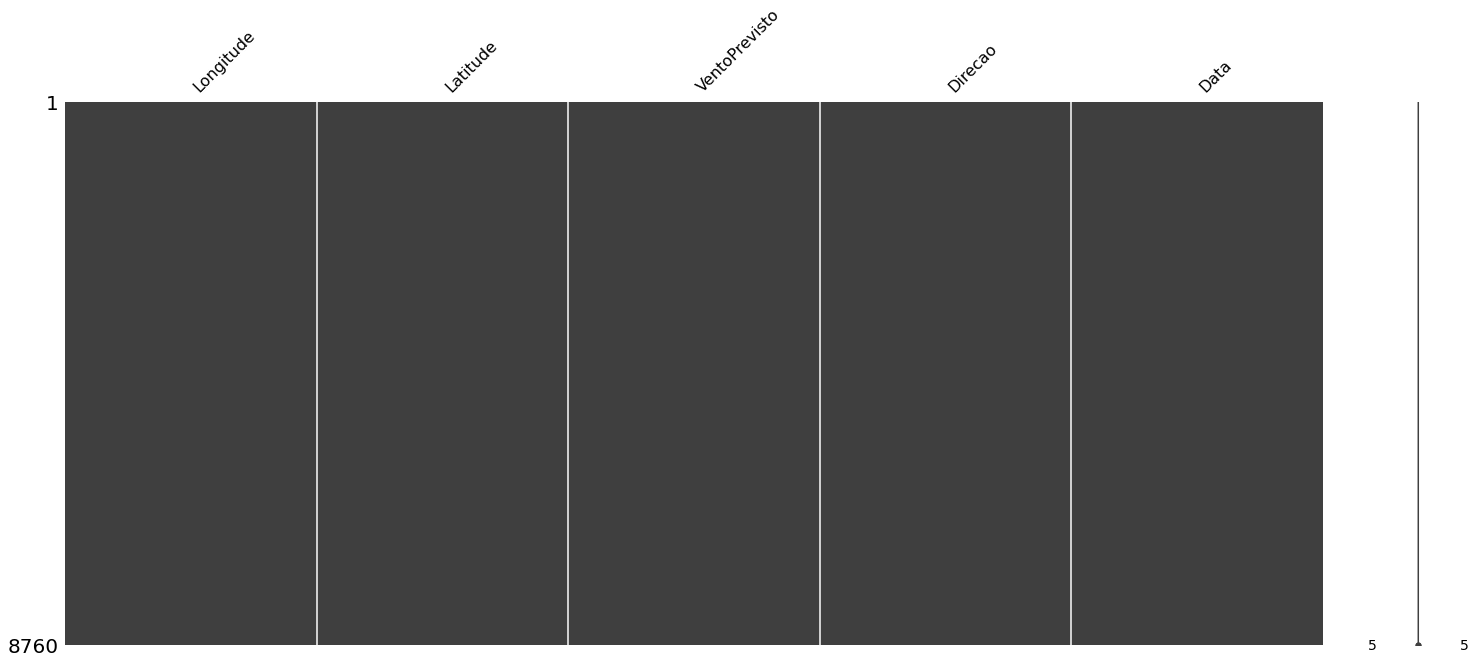

In [19]:
msno.matrix(df_result_vento)

### **F. Exporta Resultados**

In [21]:
output_file = '../../../../PrevisaoVento/Data/process/cenario1/vento_previsto.csv'
df_result_vento.to_csv(output_file, sep=';', encoding='utf-8')